In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv(r"C:\Users\RIBBONS\Downloads\AcademicPerformance_New.csv")
df



,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [18]:
# Handle missing values
df['AI'].fillna(df['AI'].mean(), inplace=True)
df['WT'].fillna(df['WT'].mode()[0], inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df




,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,is_outlier
0,1.000000,India,72.0,72.000000,74.000000,72.666667,C,Yes,False
1,2.000000,Japan,69.0,90.000000,62.235955,53.000000,B,No,False
2,50.479592,USA,69.0,64.652632,62.235955,58.663265,D,No,False
3,4.000000,China,47.0,64.652632,44.000000,30.333333,D,Yes,False
4,5.000000,India,76.0,78.000000,62.235955,51.333333,C,No,False
...,...,...,...,...,...,...,...,...,...
94,95.000000,USA,79.0,64.652632,62.235955,26.333333,A,No,False
95,96.000000,Japan,78.0,81.000000,82.000000,80.333333,A,No,False
96,97.000000,USA,65.0,66.000000,62.000000,64.333333,B,No,False
97,98.000000,Rassia,63.0,72.000000,70.000000,68.333333,B,Yes,False


In [28]:

# Detect outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df['is_outlier'] = (z_scores > 3).any(axis=1)


# Remove outliers
df_cleaned = df[~df['is_outlier']].copy()

print(df_cleaned.head())        # First 5 rows
print(df_cleaned.shape)         # Shape after removing outliers


     Roll No NationalITy    WT      DSBDA         AI    Average Grade   PG  \
0   1.000000       India  72.0  72.000000  74.000000  72.666667     C  Yes   
1   2.000000       Japan  69.0  90.000000  62.235955  53.000000     B   No   
2  50.479592         USA  69.0  64.652632  62.235955  58.663265     D   No   
3   4.000000       China  47.0  64.652632  44.000000  30.333333     D  Yes   
4   5.000000       India  76.0  78.000000  62.235955  51.333333     C   No   

   is_outlier  
0       False  
1       False  
2       False  
3       False  
4       False  
(98, 9)


In [26]:
# Apply binning to cleaned DSBDA scores
bins = [0, 25, 75, 100]
labels = ['Low', 'Medium', 'High']
df_cleaned['DSBDA_Category'] = pd.cut(df_cleaned['DSBDA'], bins=bins, labels=labels)
print(df_cleaned[['DSBDA', 'DSBDA_Category']].head(10))



       DSBDA DSBDA_Category
0  72.000000         Medium
1  90.000000           High
2  64.652632         Medium
3  64.652632         Medium
4  78.000000           High
5  83.000000           High
6  95.000000           High
7  43.000000         Medium
8  64.000000         Medium
9  60.000000         Medium


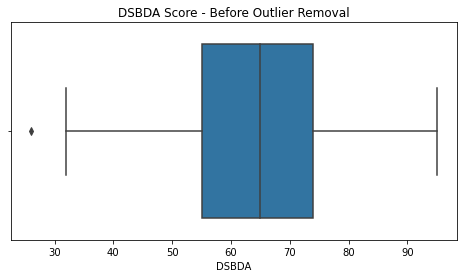

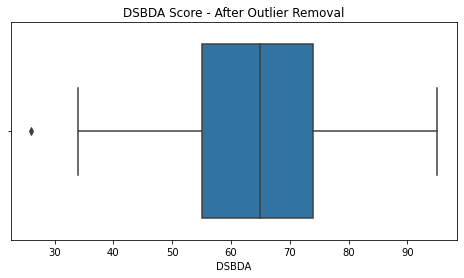

In [22]:

# ✅ Draw box plot for DSBDA before cleaning
plt.figure(figsize=(8, 4))
plt.title("DSBDA Score - Before Outlier Removal")
sns.boxplot(x='DSBDA', data=df)
plt.show()

# ✅ Draw box plot for DSBDA after outlier removal
plt.figure(figsize=(8, 4))
plt.title("DSBDA Score - After Outlier Removal")
sns.boxplot(x='DSBDA', data=df_cleaned)
plt.show()

    Roll No NationalITy    WT  DSBDA    AI    Average Grade   PG
0       1.0       India  72.0   72.0  74.0  72.666667     C  Yes
1       2.0       Japan  69.0   90.0   NaN  53.000000     B   No
2       NaN         NaN   NaN    NaN   NaN        NaN   NaN  NaN
3       4.0       China  47.0    NaN  44.0  30.333333     D  Yes
4       5.0       India  76.0   78.0   NaN  51.333333     C   No
..      ...         ...   ...    ...   ...        ...   ...  ...
94     95.0         USA  79.0    NaN   NaN  26.333333     A   No
95     96.0       Japan  78.0   81.0  82.0  80.333333     A   No
96     97.0         USA  65.0   66.0  62.0  64.333333     B   No
97     98.0      Rassia  63.0   72.0  70.0  68.333333     B  Yes
98     99.0       India  58.0   67.0   NaN  41.666667     B   No

[99 rows x 8 columns]
      Roll No NationalITy    WT      DSBDA         AI    Average Grade   PG
0    1.000000       India  72.0  72.000000  74.000000  72.666667     C  Yes
1    2.000000       Japan  69.0  90.000000  6

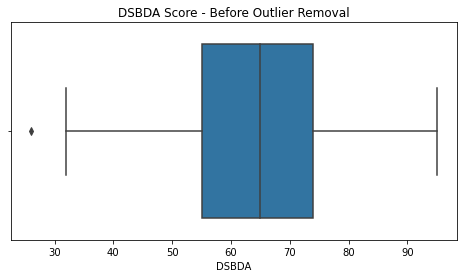

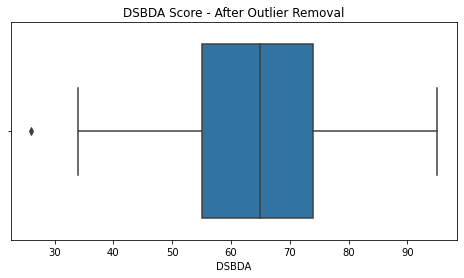

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv(r"C:\Users\RIBBONS\Downloads\AcademicPerformance_New.csv")
print(df)

# Handle missing values
df['AI'].fillna(df['AI'].mean(), inplace=True)
df['WT'].fillna(df['WT'].mode()[0], inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df)


# Detect outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df['is_outlier'] = (z_scores > 3).any(axis=1)


# Remove outliers
df_cleaned = df[~df['is_outlier']].copy()

print(df_cleaned.head())        # First 5 rows
print(df_cleaned.shape)         # Shape after removing outliers

# Apply binning to cleaned DSBDA scores
bins = [0, 25, 75, 100]
labels = ['Low', 'Medium', 'High']
df_cleaned['DSBDA_Category'] = pd.cut(df_cleaned['DSBDA'], bins=bins, labels=labels)
print(df_cleaned[['DSBDA', 'DSBDA_Category']].head(10))

# Draw box plot for DSBDA before cleaning
plt.figure(figsize=(8, 4))
plt.title("DSBDA Score - Before Outlier Removal")
sns.boxplot(x='DSBDA', data=df)
plt.show()

# Draw box plot for DSBDA after outlier removal
plt.figure(figsize=(8, 4))
plt.title("DSBDA Score - After Outlier Removal")
sns.boxplot(x='DSBDA', data=df_cleaned)
plt.show()